### 경사하강법 구현

In [2]:
import torch
import torch.nn.functional as F

In [9]:
target = torch.FloatTensor([[.1, .2, .3], [.4, .5,.6], [.7,.8,.9]])
x = torch.rand_like(target) # x를 목표값으로 설정
x.requires_grad = True # 미분계산 대상 지정
print(x)

tensor([[0.0073, 0.1132, 0.2336],
        [0.8197, 0.7401, 0.3860],
        [0.6841, 0.3964, 0.7032]], requires_grad=True)


In [10]:
loss = F.mse_loss(x, target)
print(loss)

tensor(0.0558, grad_fn=<MseLossBackward0>)


In [11]:
threshold = 1e-5 #0.00001
learning_rate = 1. # 학습률이 바꾸면 반복 횟수가 달라진다
iter_cnt = 0

while loss > threshold:
    iter_cnt += 1
    loss.backward() # 편미분 수행 -> x.grad에 미분값 저장 (backward: 반드시 스칼라값에만 적용 가능)

    x = x - learning_rate * x.grad # 손실 함수 보정 (grad 값은 고정)

    x.detach_() # x 속성을 원래 값으로 돌려놓는 함수 -> 다시 true로 해주어야 함
    x.requires_grad_(True)

    loss = F.mse_loss(x, target)

    print('%d-th Loss: %.4e' % (iter_cnt, loss))
    print(x)

1-th Loss: 3.3745e-02
tensor([[0.0279, 0.1325, 0.2483],
        [0.7264, 0.6868, 0.4336],
        [0.6877, 0.4861, 0.7469]], requires_grad=True)
2-th Loss: 2.0414e-02
tensor([[0.0439, 0.1475, 0.2598],
        [0.6539, 0.6453, 0.4705],
        [0.6904, 0.5558, 0.7810]], requires_grad=True)
3-th Loss: 1.2349e-02
tensor([[0.0564, 0.1591, 0.2687],
        [0.5975, 0.6130, 0.4993],
        [0.6925, 0.6101, 0.8074]], requires_grad=True)
4-th Loss: 7.4704e-03
tensor([[0.0661, 0.1682, 0.2757],
        [0.5536, 0.5879, 0.5217],
        [0.6942, 0.6523, 0.8280]], requires_grad=True)
5-th Loss: 4.5191e-03
tensor([[0.0736, 0.1753, 0.2811],
        [0.5195, 0.5684, 0.5391],
        [0.6955, 0.6851, 0.8440]], requires_grad=True)
6-th Loss: 2.7338e-03
tensor([[0.0795, 0.1808, 0.2853],
        [0.4929, 0.5532, 0.5526],
        [0.6965, 0.7106, 0.8564]], requires_grad=True)
7-th Loss: 1.6538e-03
tensor([[0.0840, 0.1850, 0.2886],
        [0.4723, 0.5413, 0.5632],
        [0.6973, 0.7305, 0.8661]], requi

/var/folders/4n/bn2y9j953s9cm6hn2_vxqphm0000gn/T/ipykernel_46236/4049730295.py:16: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print('%d-th Loss: %.4e' % (iter_cnt, loss))


#### 오토그래드
- 자동 미분 기능 제공
- 텐서의 requres_grad 속성을 True로 해두면, 이 텐서가 들어간 연산의 결과도 requires_grad 속성이 True가 된다.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # x
target = raw_df.values[1::2, 2]

In [29]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [30]:
raw_df.tail()

,0,1,2,3,4,5,6,7,8,9,10
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0
1011,396.90000,7.88,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [49]:
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

df = pd.DataFrame(data, columns=feature_names)
df["TARGET"] = target  # target (Median value of homes)

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


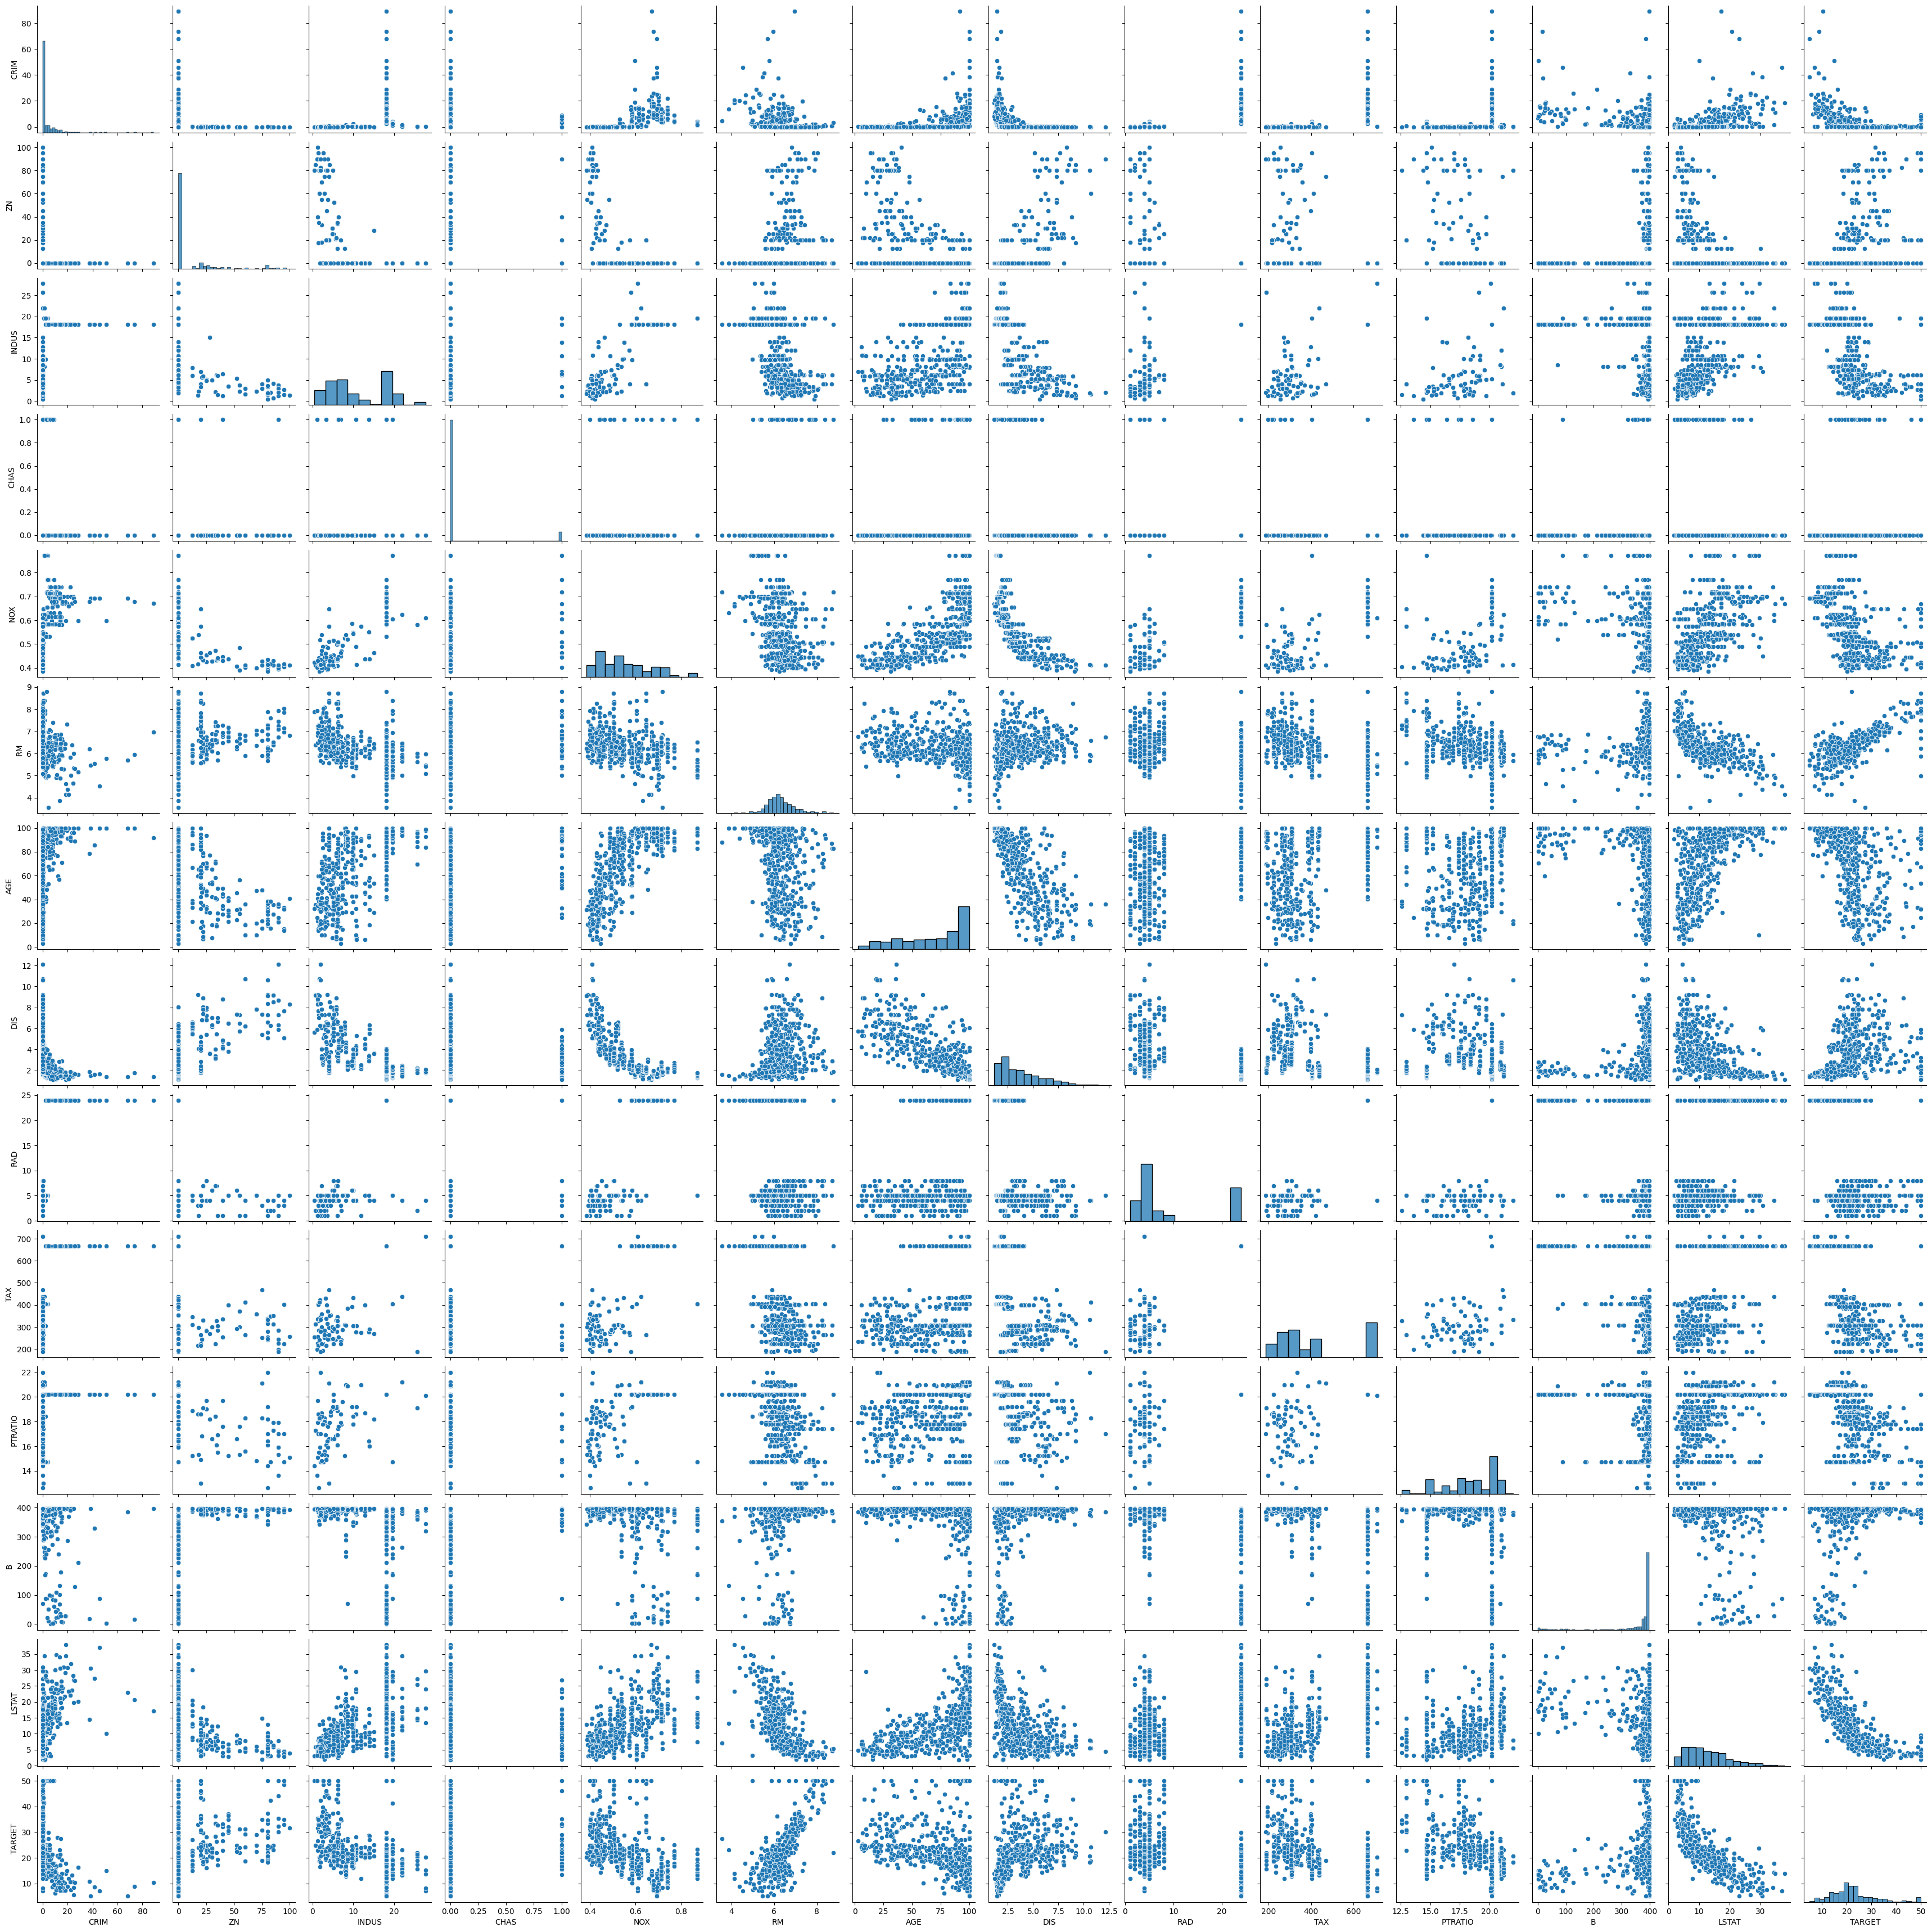

In [34]:
sns.pairplot(df)
plt.show()

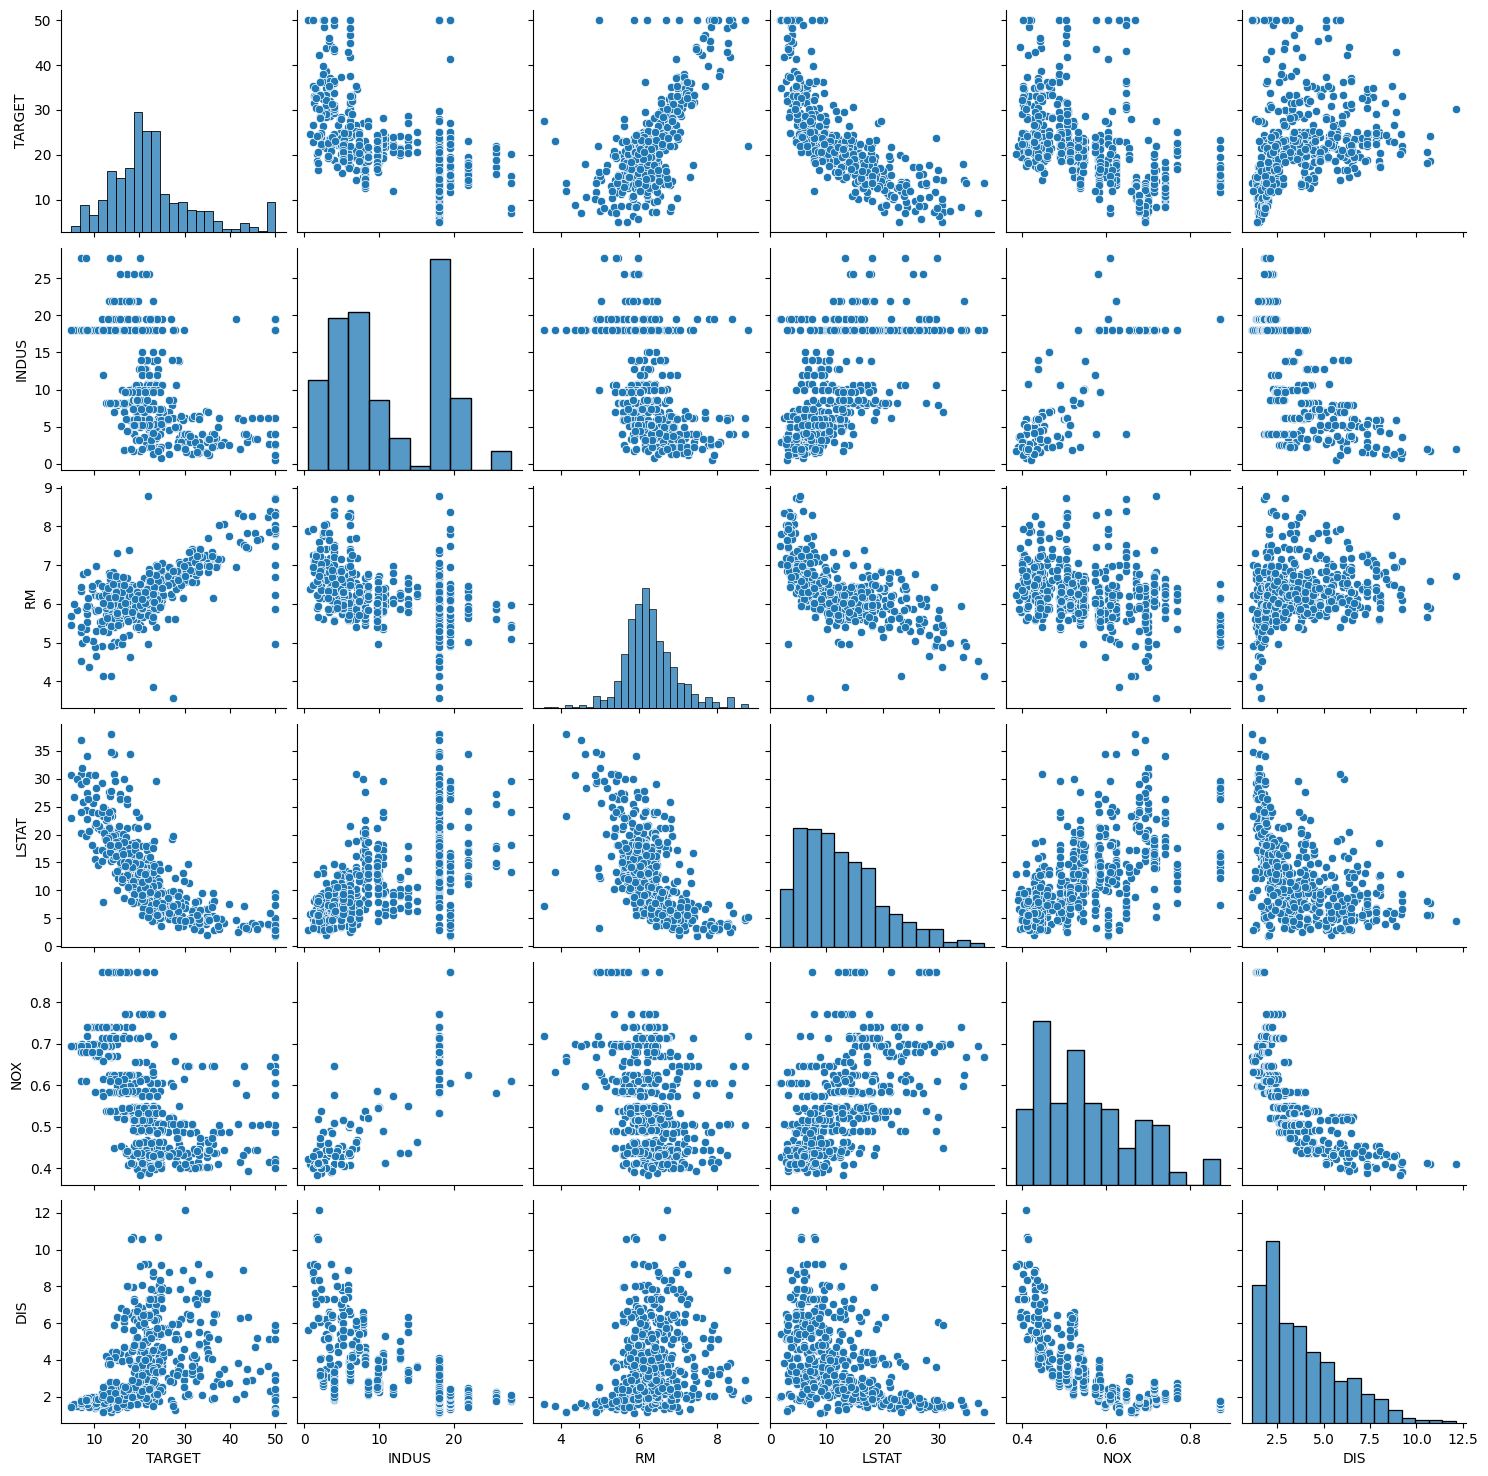

In [52]:
cols = ['TARGET', 'INDUS', 'RM', 'LSTAT', 'NOX', 'DIS']
sns.pairplot(df[cols])
plt.show()

In [53]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [54]:
# 데이터 준비
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([506, 6])

In [55]:
# 입력 데이터, 목표값
y = data[:, :1]
x = data[:, 1:]
print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [56]:
# 하이퍼파라미터 설정
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

- 파라미터: 신경망 학습의 학습 대상
    - 가중치, 편향
- 하이퍼파라미터: 학습하기 전에 사용자가 지정하는 외부 변수
    - 은닉층의 층수와 뉴런 수
        - 수가 커지면 표현력은 향상되지만, 과적합 발생 가능
    - 학습률
        - 낮으면 학습 속도가 느려지지만 안정적
    - 에폭: 전체 데이터에 대한 한 변의 학습
        - 수가 커지면 최적해에 가까워지지만, 과적합 발생 가능
    - 배치 사이즈: 한 번에 학습할 미니 배치의 크기
        - 사이즈가 커지면 파라미터의 갱신 주기가 늘어나서 학습속도가 느려지지만 안정성 좋아짐
    - 드롭아웃: 모델에서 일부 뉴런 제거함으로써 모델에 노이즈 추가
        - 비율이 커지면 과적합 감소, 학습 속도는 느려짐
    - 옵티마이저 선택: 최적화 방법 선택
        - SGD, momentum, AdaGrad, Adam 등
    - 활성화함수 선택: 복잡한 비선형 패턴을 학습하기 위한 신경만 특유의 비선형 함수
        - sign 함수, step 함수, sigmoid 함수, ReLU, LeakReLU 

In [57]:
# 모델 정의
model = nn.Linear(x.size(-1), y.size(-1))
print(model)

Linear(in_features=5, out_features=1, bias=True)


In [58]:
# 최적화 설정
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [59]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' %(i+1, loss))

Epoch 100: loss=4.6191e+01
Epoch 200: loss=3.8577e+01
Epoch 300: loss=3.4379e+01
Epoch 400: loss=3.2014e+01
Epoch 500: loss=3.0680e+01
Epoch 600: loss=2.9928e+01
Epoch 700: loss=2.9504e+01
Epoch 800: loss=2.9265e+01
Epoch 900: loss=2.9129e+01
Epoch 1000: loss=2.9053e+01
Epoch 1100: loss=2.9010e+01
Epoch 1200: loss=2.8985e+01
Epoch 1300: loss=2.8971e+01
Epoch 1400: loss=2.8962e+01
Epoch 1500: loss=2.8957e+01
Epoch 1600: loss=2.8954e+01
Epoch 1700: loss=2.8952e+01
Epoch 1800: loss=2.8951e+01
Epoch 1900: loss=2.8950e+01
Epoch 2000: loss=2.8949e+01


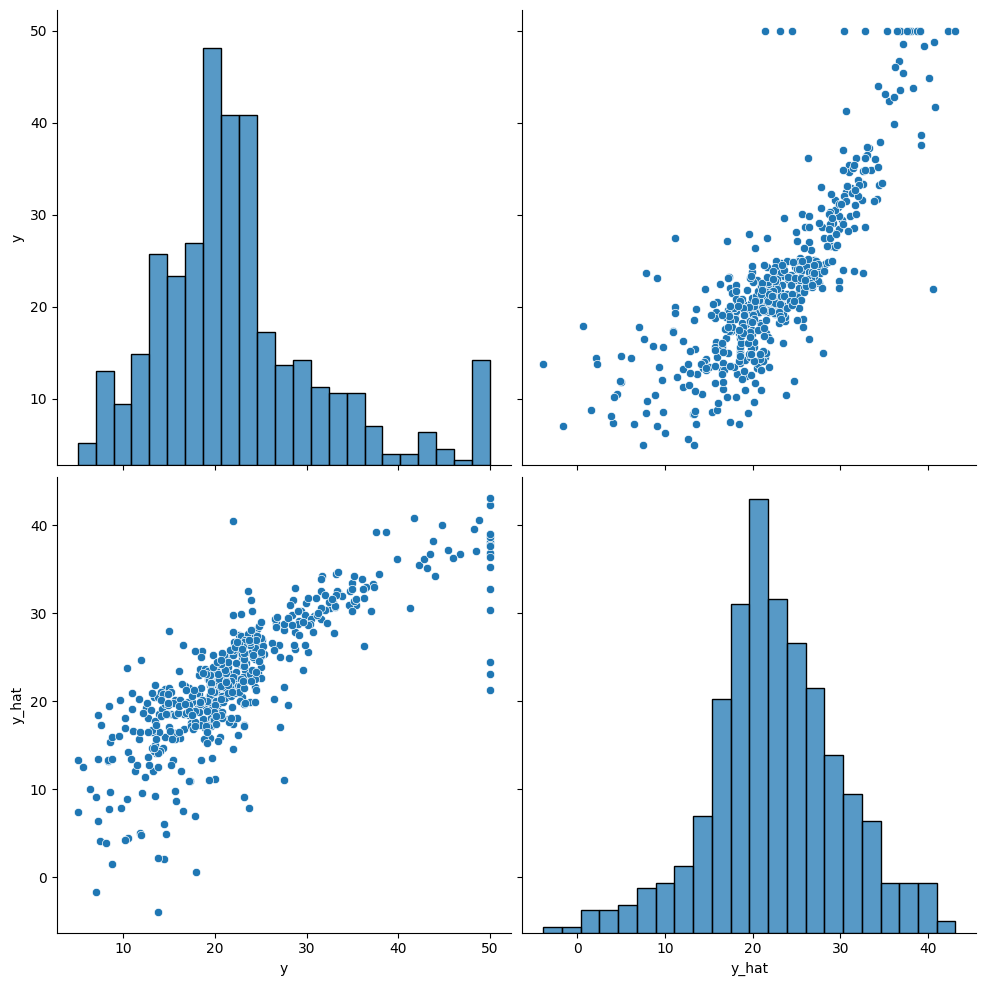

In [63]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=["y", "y_hat"])
sns.pairplot(df, height=5)
plt.show()                                                                        